## Starting settlements in Settlers of Catan

One of the first and most important steps in the game is the placement of starting settlements.  The location of starting settlements can affect what resources a player accesses, and as a result their strategy for the entire game.

In this notebook, I will explore the impact of starting settlements on overall game performance.

Features
- probabilities for acquiring specific resources
- turn order

## Import data

In [378]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('catanstats.csv')

In [379]:
df.columns

Index(['gameNum', 'player', 'points', 'me', '2', '3', '4', '5', '6', '7', '8',
       '9', '10', '11', '12', 'settlement1', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'settlement2',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'production', 'tradeGain', 'robberCardsGain',
       'totalGain', 'tradeLoss', 'robberCardsLoss', 'tribute', 'totalLoss',
       'totalAvailable'],
      dtype='object')

In [380]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 36 columns):
gameNum            200 non-null int64
player             200 non-null int64
points             200 non-null int64
me                 50 non-null float64
2                  200 non-null int64
3                  200 non-null int64
4                  200 non-null int64
5                  200 non-null int64
6                  200 non-null int64
7                  200 non-null int64
8                  200 non-null int64
9                  200 non-null int64
10                 200 non-null int64
11                 200 non-null int64
12                 200 non-null int64
settlement1        200 non-null int64
Unnamed: 16        200 non-null object
Unnamed: 17        200 non-null int64
Unnamed: 18        200 non-null object
Unnamed: 19        200 non-null int64
Unnamed: 20        200 non-null object
settlement2        200 non-null int64
Unnamed: 22        200 non-null object
Unnamed: 23     

In [381]:
df.head()

,gameNum,player,points,me,2,3,4,5,6,7,...,Unnamed: 26,production,tradeGain,robberCardsGain,totalGain,tradeLoss,robberCardsLoss,tribute,totalLoss,totalAvailable
0,1,1,5,NaN,1,3,5,8,7,10,...,O,38,5,2,45,10,2,4,16,29
1,1,2,9,1.0,1,3,5,8,7,10,...,O,48,8,6,62,11,1,8,20,42
2,1,3,10,NaN,1,3,5,8,7,10,...,C,44,14,9,67,24,4,0,28,39
3,1,4,5,NaN,1,3,5,8,7,10,...,S,42,12,0,54,24,6,0,30,24
4,2,1,10,NaN,1,6,3,9,10,8,...,2L,60,15,16,91,28,10,0,38,53


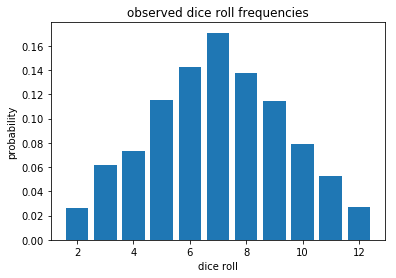

In [382]:
#Probabilities for specific dice rolls over the course of all games
#Looks about right to me

plt.bar(range(2,13),\
        df[['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']].sum()
        /df[['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']].sum().sum())
plt.xlabel('dice roll')
plt.ylabel('probability')
plt.title('observed dice roll frequencies')

## Exploring starting probabilities

In [383]:
#Probabilities when rolling 2d6:
#2: 1/36
#3: 2/36
#4: 3/36
#5: 4/36
#6: 5/36
#8: 5/36
#9: 4/36
#10: 3/36
#11: 2/36
#12: 1/36

starting_settlements = df[['settlement1', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'settlement2',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26']]

#S: Sheep
#C: Clay
#O: Ore
#W: Wheat
#L: Lumber
resources = ['S','C','O','W','L']

#computes probability out of 36 for getting a particular resource
def compute_prob(dice_roll):
    deviance = min(dice_roll, 14-dice_roll)
    return (deviance-1)

#This does not account for overlaps: i.e. if someone builds on repeating numbers
#Though the expected value should balance out over the course of the game
def get_probs(starting_settlements, resource):
    starting_settlements[resource + ' Prob'] = 0
    for i, column in enumerate(starting_settlements.columns):
        is_rec = starting_settlements.iloc[:,i].apply(lambda x: x == resource)
        starting_settlements.loc[is_rec,resource + ' Prob'] += starting_settlements[is_rec].iloc[:,i-1].apply(lambda x: compute_prob(int(x)))

for res in resources:
    get_probs(starting_settlements, res)

starting_settlements.head(10)

C:\Users\Avi\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Avi\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,settlement1,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,settlement2,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,S Prob,C Prob,O Prob,W Prob,L Prob
0,6,L,3,C,11,C,9,L,10,W,11,O,0,4,2,3,9
1,5,W,8,O,10,W,4,L,5,S,11,O,4,0,7,7,3
2,5,S,6,S,12,W,8,O,4,S,3,C,12,2,5,1,0
3,6,O,9,L,3,L,4,L,8,L,10,S,3,0,5,0,14
4,6,W,9,O,10,O,8,W,10,L,0,2L,0,0,7,10,3
5,5,C,8,S,10,O,8,W,4,L,3,W,5,4,3,7,3
6,5,C,6,W,11,O,5,C,9,W,10,L,0,8,2,9,3
7,4,C,9,W,11,O,6,L,4,C,3,S,2,6,2,4,5
8,5,L,4,L,10,C,6,W,3,L,11,S,2,3,0,5,9
9,5,W,8,O,10,C,4,L,9,W,11,S,2,3,5,8,3


## What about 2:1 port access?

It's rare that someone will build one of their first settlements on a port, as ports are adjacent to only 1 or 2 resources as opposed to 3.  Though there is the case where someone might want to capitalize on strong access to a particular resource to build a vertical monopoly of sorts.

In [384]:
def get_port(starting_settlements, resource):
    starting_settlements[resource + ' Port'] = False
    for i, column in enumerate(starting_settlements.columns):
        starting_settlements.loc[:,resource + ' Port'] = starting_settlements[column].apply(lambda x: x == '2' + resource) | starting_settlements[resource + ' Port']

for res in resources:
    get_port(starting_settlements, res)

starting_settlements.head(10)

C:\Users\Avi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Avi\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,settlement1,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,settlement2,Unnamed: 22,Unnamed: 23,Unnamed: 24,...,S Prob,C Prob,O Prob,W Prob,L Prob,S Port,C Port,O Port,W Port,L Port
0,6,L,3,C,11,C,9,L,10,W,...,0,4,2,3,9,False,False,False,False,False
1,5,W,8,O,10,W,4,L,5,S,...,4,0,7,7,3,False,False,False,False,False
2,5,S,6,S,12,W,8,O,4,S,...,12,2,5,1,0,False,False,False,False,False
3,6,O,9,L,3,L,4,L,8,L,...,3,0,5,0,14,False,False,False,False,False
4,6,W,9,O,10,O,8,W,10,L,...,0,0,7,10,3,False,False,False,False,True
5,5,C,8,S,10,O,8,W,4,L,...,5,4,3,7,3,False,False,False,False,False
6,5,C,6,W,11,O,5,C,9,W,...,0,8,2,9,3,False,False,False,False,False
7,4,C,9,W,11,O,6,L,4,C,...,2,6,2,4,5,False,False,False,False,False
8,5,L,4,L,10,C,6,W,3,L,...,2,3,0,5,9,False,False,False,False,False
9,5,W,8,O,10,C,4,L,9,W,...,2,3,5,8,3,False,False,False,False,False


In [385]:
#There are very few observations in which someone built their first settlement on a port.
#Because of this, I doubt that it will be informative in a predictive model

starting_settlements.iloc[:, 12:].sum()

S Prob    795.0
C Prob    723.0
O Prob    723.0
W Prob    941.0
L Prob    819.0
S Port      7.0
C Port      3.0
O Port      6.0
W Port      4.0
L Port      4.0
dtype: float64

## Let's try making a classification model

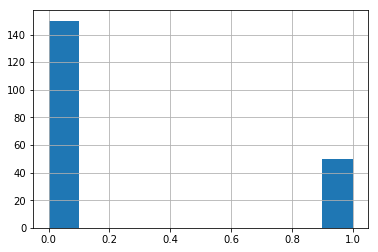

In [529]:
win.hist()
# 3:1 class ratio (there can only be 1 winner each game)

In [530]:
#I want to use the starting settlement data to predict if a player will win

win = df['points'].apply(lambda x: x >= 10)

cols = [i + ' Prob' for i in resources]
X = starting_settlements[cols].copy()
#Turn order
X['turn order'] = df['player']

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
X, y = shuffle(X, win)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

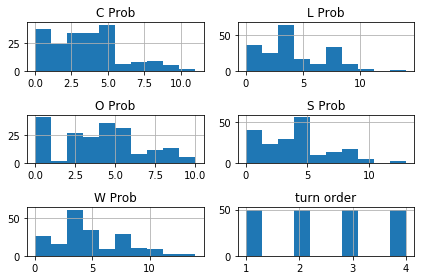

In [539]:
#Distributions are fairly similar across access probabilities

X.hist()
plt.tight_layout()

In [531]:
#Let's try throwing sklearn at it
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

mdl = RandomForestClassifier(n_estimators=20, max_depth=3, n_jobs=-1)

mdl.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Train accuracy: 0.761194029851
Test accuracy: 0.742424242424
Train precision: 1.0
Test precision: 0.0


C:\Users\Avi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Train AUC: 0.904440444044
Test AUC: 0.516206482593


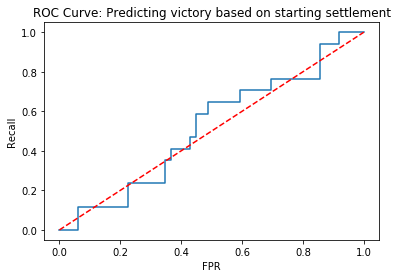

In [532]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score, confusion_matrix

print('Train accuracy:', mdl.score(X_train, y_train))
print('Test accuracy:', mdl.score(X_test, y_test))

print('Train precision:', precision_score(y_train, mdl.predict(X_train)))
print('Test precision:', precision_score(y_test, mdl.predict(X_test)))

y_prob_train = mdl.predict_proba(X_train)[:,1]
y_prob_test = mdl.predict_proba(X_test)[:,1]
print('Train AUC:', roc_auc_score(y_train, y_prob_train))
print('Test AUC:', roc_auc_score(y_test, y_prob_test))

fpr, tpr, thresholds = roc_curve(y_test, y_prob_test, pos_label=1)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('FPR')
plt.ylabel('Recall')
plt.title('ROC Curve: Predicting victory based on starting settlement')


The initial model is overfitting.

The test performance is more-or-less random (there's a 3:1 class ratio, so 75% accuracy is equivalent to predicting the mode)

In [533]:
#What is the relative importance of each feature?

sorted(list(zip(X.columns, mdl.feature_importances_)), key = lambda x: x[1], reverse=True)
#sorted(list(zip(X.columns, mdl.coef_[0])), key = lambda x: x[1], reverse=True)

[('W Prob', 0.20465253272010919),
 ('turn order', 0.19302545598516721),
 ('C Prob', 0.173465020330622),
 ('L Prob', 0.1589390450517478),
 ('O Prob', 0.15435893192915867),
 ('S Prob', 0.11555901398319515)]

It seems that early wheat access has the biggest effect on game performance. This makes sense, as wheat is required for 3 out of the 4 build options in the game (roads, settlements, cities and development cards).

## Maybe a regression model might work better

In [534]:
#I want to use the starting settlement data to predict the number of points a player will get in a game
y = df['points']

cols = [i + ' Prob' for i in resources]
X = starting_settlements[cols].copy()
#Turn order
X['turn order'] = df['player']

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
X, y = shuffle(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [535]:
#Let's try throwing sklearn at it
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

#mdl = RandomForestRegressor(n_estimators=20, max_depth=3, n_jobs=-1)
mdl = Ridge()

mdl.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Train r2: 0.126606223156
Test r2: 0.0317906676073
Train mse:  3.83386597744
Test mse:  4.87949942011


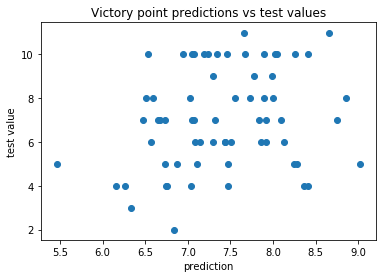

In [536]:
from sklearn.metrics import mean_squared_error

print('Train r2:', mdl.score(X_train, y_train))
print('Test r2:', mdl.score(X_test, y_test))

print('Train mse: ',mean_squared_error(y_train, mdl.predict(X_train)))
print('Test mse: ', mean_squared_error(y_test, mdl.predict(X_test)))

plt.scatter(mdl.predict(X_test), y_test)
plt.xlabel('prediction')
plt.ylabel('test value')
plt.title('Victory point predictions vs test values')

In [537]:
#What is the relative importance of each feature?

#sorted(list(zip(X.columns, mdl.feature_importances_)), key = lambda x: x[1], reverse=True)
sorted(list(zip(X.columns, mdl.coef_)), key = lambda x: x[1], reverse=True)

[('O Prob', 0.40553621681517338),
 ('L Prob', 0.39240986647661485),
 ('S Prob', 0.35709948107176853),
 ('W Prob', 0.3090796018098117),
 ('C Prob', 0.26005732630294093),
 ('turn order', -0.035643664069694533)]

The weights are somewhat uniform for the regression model, with the exception of Ore.  Ore is essential for building cities and accessing development cards, which are crucial for acquiring points late-game, when there are no more opportunities to build new settlements.